In [1]:
#import preliminaries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [2]:
nfl = pd.read_excel('Data/NFL Ratings.xlsx')
barley = pd.read_excel('Data/barley-60.xlsx')
poultry = pd.read_excel('Data/Poultry Price.xlsx')
wing = pd.read_csv('Data/Jumbo Wing Price Monthly Comparison.csv')

In [3]:
nfl.head()
nfl_group = nfl.groupby(["Month", "Year"])
nfl_mean = nfl_group.mean()
nfl_mean.reset_index(inplace=True)
nfl_mean.head()

,Month,Year,RTG,+/-,VWRS in millions
0,Aug,2017,1.485652,0.076957,2.377522
1,Aug,2018,1.445652,0.133913,2.382565
2,Dec,2014,9.911538,0.009231,16.561154
3,Dec,2015,10.812500,0.010625,18.656250
4,Dec,2016,9.669444,0.122222,17.577778


In [4]:
wing.head()

,Month,Year,Price
0,Jan,2009,1.3557
1,Feb,2009,1.4300
2,Mar,2009,1.4105
3,Apr,2009,1.3214
4,May,2009,1.3200


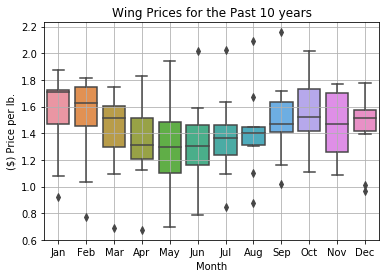

In [5]:
#Create Box and Wisker plot to show wing prices for each month

x = wing["Month"]
y = wing["Price"]

wgraph = sns.boxplot(x, y)
wgraph.set_title("Wing Prices for the Past 10 years")
wgraph.set_ylabel('($) Price per lb.')
wgraph.grid(b=True, which='major')

In [6]:
barley.head()

,Date,Month,Year,Comodity,Price,Change
0,2014-02-01,Feb,2014,Barley,169.94,-
1,2014-03-01,Mar,2014,Barley,177.75,0.046
2,2014-04-01,Apr,2014,Barley,181.42,0.0206
3,2014-05-01,May,2014,Barley,181.88,0.0025
4,2014-06-01,Jun,2014,Barley,160.29,-0.1187


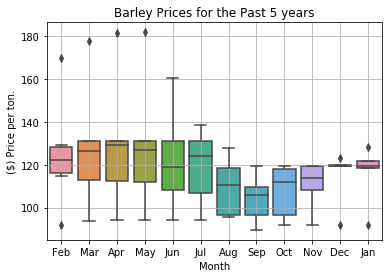

In [7]:
x = barley["Month"]
y = barley["Price"]

bgraph = sns.boxplot(x, y)
bgraph.set_title("Barley Prices for the Past 5 years")
bgraph.set_ylabel('($) Price per ton.')
bgraph.grid(b=True, which='major')

In [8]:
#Combine Month and Year column to get a common time frame
nfl_mean["period"] = nfl_mean["Year"].map(str) + nfl_mean["Month"]
wing["period"] = wing["Year"].map(str) + wing["Month"]
barley["period"] = barley["Year"].map(str) + barley["Month"]
poultry["period"] = poultry["Year"].map(str) + poultry["Month"]

In [9]:
nfl_mean.head()

,Month,Year,RTG,+/-,VWRS in millions,period
0,Aug,2017,1.485652,0.076957,2.377522,2017Aug
1,Aug,2018,1.445652,0.133913,2.382565,2018Aug
2,Dec,2014,9.911538,0.009231,16.561154,2014Dec
3,Dec,2015,10.812500,0.010625,18.656250,2015Dec
4,Dec,2016,9.669444,0.122222,17.577778,2016Dec


In [10]:
ratings_wing_price = wing.merge(nfl_mean, left_on='period', right_on='period')
ratings_wing_price.head()

,Month_x,Year_x,Price,period,Month_y,Year_y,RTG,+/-,VWRS in millions
0,Oct,2014,1.6778,2014Oct,Oct,2014,10.315385,0.258846,17.194231
1,Nov,2014,1.5956,2014Nov,Nov,2014,10.668966,-0.009655,18.468621
2,Dec,2014,1.5324,2014Dec,Dec,2014,9.911538,0.009231,16.561154
3,Jan,2015,1.7090,2015Jan,Jan,2015,20.380000,-0.050000,36.349000
4,Feb,2015,1.6275,2015Feb,Feb,2015,47.500000,0.020000,114.440000


In [11]:
ratings_wing_price.sort_values(by=['period'], inplace=True)
ratings_wing_price.head()

,Month_x,Year_x,Price,period,Month_y,Year_y,RTG,+/-,VWRS in millions
2,Dec,2014,1.5324,2014Dec,Dec,2014,9.911538,0.009231,16.561154
1,Nov,2014,1.5956,2014Nov,Nov,2014,10.668966,-0.009655,18.468621
0,Oct,2014,1.6778,2014Oct,Oct,2014,10.315385,0.258846,17.194231
7,Dec,2015,1.4977,2015Dec,Dec,2015,10.812500,0.010625,18.656250
4,Feb,2015,1.6275,2015Feb,Feb,2015,47.500000,0.020000,114.440000


In [12]:
ratings_wing_price

,Month_x,Year_x,Price,period,Month_y,Year_y,RTG,+/-,VWRS in millions
2,Dec,2014,1.5324,2014Dec,Dec,2014,9.911538,0.009231,16.561154
1,Nov,2014,1.5956,2014Nov,Nov,2014,10.668966,-0.009655,18.468621
0,Oct,2014,1.6778,2014Oct,Oct,2014,10.315385,0.258846,17.194231
7,Dec,2015,1.4977,2015Dec,Dec,2015,10.812500,0.010625,18.656250
4,Feb,2015,1.6275,2015Feb,Feb,2015,47.500000,0.020000,114.440000
3,Jan,2015,1.7090,2015Jan,Jan,2015,20.380000,-0.050000,36.349000
6,Nov,2015,1.4700,2015Nov,Nov,2015,9.966667,0.058333,17.144444
5,Oct,2015,1.5177,2015Oct,Oct,2015,11.040000,0.035000,18.383333
10,Dec,2016,1.7800,2016Dec,Dec,2016,9.669444,0.122222,17.577778
9,Nov,2016,1.7715,2016Nov,Nov,2016,10.136364,-0.020455,18.231818


In [13]:
#Calculate Rolling Average for viewers
rVRWS = ratings_wing_price["+/-"].rolling(window=2).mean()


C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


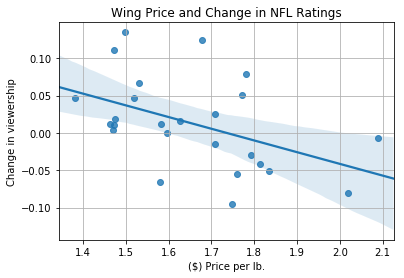

In [14]:
#Graph corelation in viewers and wing price
x = ratings_wing_price["Price"]
y = rVRWS

vwing = sns.regplot(x, y, data=ratings_wing_price)
vwing.set_title("Wing Price and Change in NFL Ratings")
vwing.set_ylabel('Change in viewership')
vwing.set_xlabel('($) Price per lb.')
vwing.grid(b=True, which='major')


In [15]:
#merge barley and wing price
barley_wing_price = wing.merge(barley, left_on='period', right_on='period')
barley_wing_price.head()

,Month_x,Year_x,Price_x,period,Date,Month_y,Year_y,Comodity,Price_y,Change
0,Feb,2014,1.0360,2014Feb,2014-02-01,Feb,2014,Barley,169.94,-
1,Mar,2014,1.0952,2014Mar,2014-03-01,Mar,2014,Barley,177.75,0.046
2,Apr,2014,1.1238,2014Apr,2014-04-01,Apr,2014,Barley,181.42,0.0206
3,May,2014,1.0790,2014May,2014-05-01,May,2014,Barley,181.88,0.0025
4,Jun,2014,1.1267,2014Jun,2014-06-01,Jun,2014,Barley,160.29,-0.1187


In [16]:
barley_wing_price

,Month_x,Year_x,Price_x,period,Date,Month_y,Year_y,Comodity,Price_y,Change
0,Feb,2014,1.0360,2014Feb,2014-02-01,Feb,2014,Barley,169.94,-
1,Mar,2014,1.0952,2014Mar,2014-03-01,Mar,2014,Barley,177.75,0.046
2,Apr,2014,1.1238,2014Apr,2014-04-01,Apr,2014,Barley,181.42,0.0206
3,May,2014,1.0790,2014May,2014-05-01,May,2014,Barley,181.88,0.0025
4,Jun,2014,1.1267,2014Jun,2014-06-01,Jun,2014,Barley,160.29,-0.1187
5,Jul,2014,1.2109,2014Jul,2014-07-01,Jul,2014,Barley,138.71,-0.1346
6,Aug,2014,1.3067,2014Aug,2014-08-01,Aug,2014,Barley,118.50,-0.1457
7,Sep,2014,1.5071,2014Sep,2014-09-01,Sep,2014,Barley,105.64,-0.1085
8,Oct,2014,1.6778,2014Oct,2014-10-01,Oct,2014,Barley,112.07,0.0609
9,Nov,2014,1.5956,2014Nov,2014-11-01,Nov,2014,Barley,113.91,0.0164


In [17]:
#Calculate Rolling Average
rbarley = barley_wing_price["Price_y"].rolling(window=2).mean()

C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


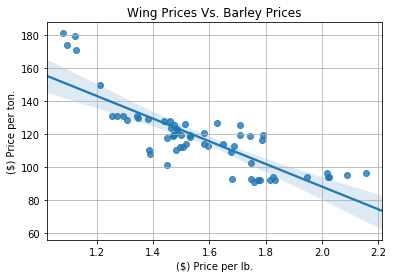

In [18]:
#Graph Corelation between Barley Price and Jumbo Wing Price
x = barley_wing_price["Price_x"]
y = rbarley

bwing = sns.regplot(x, y, data=barley_wing_price)
bwing.set_title("Wing Prices Vs. Barley Prices")
bwing.set_ylabel('($) Price per ton.')
bwing.set_xlabel('($) Price per lb.')
bwing.grid(b=True, which='major')

In [19]:
#view poultry data set
poultry.head()

,Month,Year,Comodity,Price,Change,period
0,Feb,2009,Poultry,1.91,-,2009Feb
1,Mar,2009,Poultry,1.89,-0.0105,2009Mar
2,Apr,2009,Poultry,1.88,-0.0053,2009Apr
3,May,2009,Poultry,1.92,0.0213,2009May
4,Jun,2009,Poultry,1.94,0.0104,2009Jun


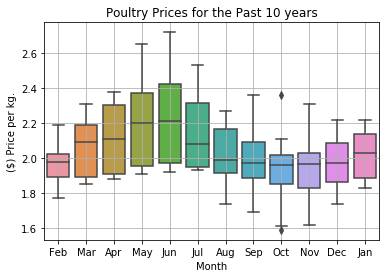

In [20]:
#Graph fluctuation in Poultry Price
x = poultry["Month"]
y = poultry["Price"]

pgraph = sns.boxplot(x, y)
pgraph.set_title("Poultry Prices for the Past 10 years")
pgraph.set_ylabel('($) Price per kg.')
pgraph.grid(b=True, which='major')

In [21]:
#merge wing price and poultry price
poultry_wing_price = wing.merge(poultry, left_on='period', right_on='period')
poultry_wing_price.head()

,Month_x,Year_x,Price_x,period,Month_y,Year_y,Comodity,Price_y,Change
0,Feb,2009,1.4300,2009Feb,Feb,2009,Poultry,1.91,-
1,Mar,2009,1.4105,2009Mar,Mar,2009,Poultry,1.89,-0.0105
2,Apr,2009,1.3214,2009Apr,Apr,2009,Poultry,1.88,-0.0053
3,May,2009,1.3200,2009May,May,2009,Poultry,1.92,0.0213
4,Jun,2009,1.3200,2009Jun,Jun,2009,Poultry,1.94,0.0104


C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


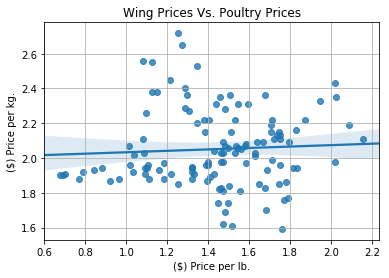

In [22]:
#Graph Corelation between Poultry Price and Jumbo Wing Price
x = poultry_wing_price["Price_x"]
y = poultry_wing_price["Price_y"]

bwing = sns.regplot(x, y, data=poultry_wing_price)
bwing.set_title("Wing Prices Vs. Poultry Prices")
bwing.set_ylabel('($) Price per kg.')
bwing.set_xlabel('($) Price per lb.')
bwing.grid(b=True, which='major')

In [23]:
#merge barley and poultry price
barley_chicken_price = poultry.merge(barley, left_on='period', right_on='period')
barley_chicken_price.head()

,Month_x,Year_x,Comodity_x,Price_x,Change_x,period,Date,Month_y,Year_y,Comodity_y,Price_y,Change_y
0,Feb,2014,Poultry,2.02,-0.0427,2014Feb,2014-02-01,Feb,2014,Barley,169.94,-
1,Mar,2014,Poultry,2.26,0.1188,2014Mar,2014-03-01,Mar,2014,Barley,177.75,0.046
2,Apr,2014,Poultry,2.38,0.0531,2014Apr,2014-04-01,Apr,2014,Barley,181.42,0.0206
3,May,2014,Poultry,2.56,0.0756,2014May,2014-05-01,May,2014,Barley,181.88,0.0025
4,Jun,2014,Poultry,2.55,-0.0039,2014Jun,2014-06-01,Jun,2014,Barley,160.29,-0.1187


In [24]:
#Calculate Rolling Average
rcbarley = barley_chicken_price["Price_y"].rolling(window=2).mean()

C:\Users\mcoats\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


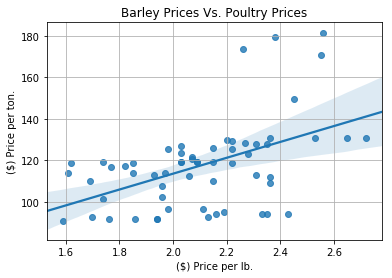

In [25]:
#Graph Corelation between Poultry Price and Barley Price

x = barley_chicken_price["Price_x"]
y = rcbarley

bwing = sns.regplot(x, y)
bwing.set_title("Barley Prices Vs. Poultry Prices")
bwing.set_ylabel('($) Price per ton.')
bwing.set_xlabel('($) Price per lb.')
bwing.grid(b=True, which='major')

In [26]:
#merge all data sets together
brw = ratings_wing_price.merge(barley, left_on='period', right_on='period')
combined = brw.merge(poultry, left_on='period', right_on='period')

#save as a .csv

combined.to_csv("Wing Commodity Database.csv")